### SKBL - JSON data occupation

#### Other sources we sync
* [Arken](https://github.com/salgo60/open-data-examples/blob/master/Arken.ipynb) 
  * WD [Property:P8899](https://www.wikidata.org/wiki/Property:P8899) 
* [Kulturpersoner Uppsalakyrkogård](https://github.com/salgo60/open-data-examples/blob/master/Check%20WD%20kulturpersoner%20uppsalakyrkogardar.ipynb)
* [Litteraturbanken](https://github.com/salgo60/open-data-examples/blob/master/Litteraturbanken%20Author.ipynb) 
  * WD property [P5101](https://www.wikidata.org/wiki/Property_talk:P5101) [P5123](https://www.wikidata.org/wiki/Property_talk:P5123)
* [Nobelprize.org](https://github.com/salgo60/open-data-examples/blob/master/Nobel%20API.ipynb)
  * WD [property 8024](https://www.wikidata.org/wiki/Property:P8024)
* [SBL](https://github.com/salgo60/open-data-examples/blob/master/SBL.ipynb) 
  * WD [property 3217](https://www.wikidata.org/wiki/Property:P3217) 
* [SKBL](https://github.com/salgo60/open-data-examples/blob/master/Svenskt%20Kvinnobiografiskt%20lexikon%20part%203.ipynb)
  * WD [property 4963](https://www.wikidata.org/wiki/Property:P4963)
* [Svenska Akademien](https://github.com/salgo60/open-data-examples/blob/master/Svenska%20Akademien.ipynb) 
  * WD [property 5325](https://www.wikidata.org/wiki/Property:P5325) 


In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-08-15 11:43:14.033479


In [2]:
import urllib3, json
import pandas as pd 
http = urllib3.PoolManager() 


url = "https://ws.spraakbanken.gu.se/ws/karp/v5/query?mode=skbl&q=extended%7C%7Cand%7Cskblstatus%7Cequals%7Cok&size=10000"
r = http.request('GET', url) 
data = json.loads(r.data.decode('utf-8')) 

listSKBLYrke = []
i = 0 
for row in (data["hits"]["hits"]):
#    print(row)
#    print (row["_source"]["url"])

    new_item = dict()
    new_item['skblid'] = row["_source"]["url"]
   
    try:
        #print (row["_source"]["occupation"])
        for o in row["_source"]['occupation']:    
#            print("\t",o['description'])
#            print("\t\t",o['detail'])
#            print("\t\t",o['place'])
#            print("\t\t",o['type'])
#	 Sakkunnig
#		 Sakkunnig, bl a 1924 års privatskoleutredning
#		 {'pin': {'lat': 59.329323, 'lon': 18.068581}, 'place': 'Stockholm'}
#		 Ideellt arbete
#	 Chef
#		 VD, Kvinnornas Andelsförening Svenska Hem
#		 {'pin': {'lat': 59.329323, 'lon': 18.068581}, 'place': 'Stockholm'}
#		 Yrke
            try:
                description = o['description']
            except:
                description = ""
            new_item['description'] = description 
            try:
                detail = o['detail']               
            except:
                detail = ""
            new_item['detail'] = detail 
            try:
                occupationtype = o['type']
            except:
                occupationtype = ""
            new_item['occupationtype'] = occupationtype 

    except Exception as e: 
        print(e)
    listSKBLYrke.append(new_item)
    i = i + 1 
    #print (i)
print (len(listSKBLYrke) ," antal poster")


'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
'occupation'
2055  antal poster


In [3]:
#listSKBLYrke

In [4]:
import pandas as pd
newListdf = pd.DataFrame(listSKBLYrke,columns=list(["skblid","description","detail","occupationtype"]))

In [5]:
newListdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   skblid          2055 non-null   object
 1   description     2038 non-null   object
 2   detail          2038 non-null   object
 3   occupationtype  2038 non-null   object
dtypes: object(4)
memory usage: 64.3+ KB


In [6]:
newListdf.head(5)

,skblid,description,detail,occupationtype
0,AstridAagesen,Gallerist,Gallerist,Yrke
1,MargitAbenius,Litteraturkritiker,"Litteraturkritiker, BLM, Ord &amp; Bild, Sveri...",Yrke
2,EuphrosyneAbrahamson,Sångare,Operasångare,Yrke
3,AlmaAbrahamsson,Föreläsare,"Dövtolk, föreläsare, arrangör av kurser och fr...",Yrke
4,IngelaMargaretaAbrahamsson,Sångare,"Vissångare, textförfattare, revyartist, bl a A...",Yrke


In [7]:
newListdf["skblid"].value_counts()

AliceTrolleWachtmeister       1
MaudReutersward               1
BedaLevinaAronssonGalle       1
GunillaBielke                 1
MirjamFuruhjelm               1
                             ..
KarinSofiaElisabethdeLaval    1
LotteLaserstein               1
SiriBerg0                     1
RiborgBovingAlbraten          1
KerstinNordendahl             1
Name: skblid, Length: 2055, dtype: int64

In [8]:
Yrkendf = newListdf["description"].value_counts()
Yrkendf

Författare                          208
Lärare                              147
Konstnär                            114
Skådespelare                         80
Socialt och filantropiskt arbete     66
                                   ... 
Socialarbetare                        1
Lotta                                 1
Soldat                                1
Drottning av Sverige och Norge        1
Författare, illustratör               1
Name: description, Length: 229, dtype: int64

In [9]:
newListdf["occupationtype"].value_counts()

Yrke              1681
Ideellt arbete     357
Name: occupationtype, dtype: int64

Text(0.5, 1.0, 'Vanligaste Yrken i SKBL')

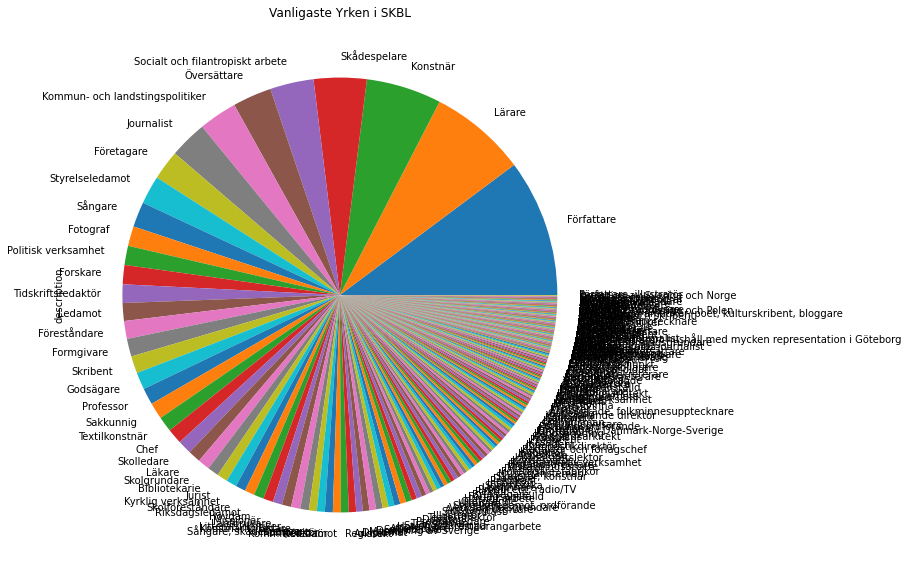

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
ax = Yrkendf.plot(kind='pie')

ax.set_title("Vanligaste Yrken i SKBL")

In [18]:
fig = ax.get_figure()
plt.rcParams['savefig.facecolor']='white'
fig.savefig('../img/SKBL_yrken_json.png')

In [21]:
newListdf.to_csv("SKBLyrken_newListdf.csv")
Yrkendf.to_csv("SKBLyrken_valuecount.csv")
